In [70]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import glob
from keras.preprocessing import image
from scipy import spatial

**8.1.1 Prepare main image feature**

In [71]:
# Load main image
main_image = cv2.imread('./pic.jpg')
main_image = cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB)
h, w, c = main_image.shape
print(main_image.shape)

# Define tile size
tile_width, tile_hight = 30, 30
tile_size = (tile_width, tile_hight)  # (Width,Height)

# Create main image feature grid of subimage
# Calculate average (mean) color of each subimage with tile_size

main_image_feature = cv2.resize(
    main_image, dsize=(w//tile_width, h//tile_hight))
print(main_image_feature.shape)
for i in range(0, main_image_feature.shape[0]):
    for j in range(0, main_image_feature.shape[1]):
        main_image_feature[i, j] = main_image[i*tile_hight: (
            i+1)*tile_hight, j*tile_width: (j+1)*tile_width].mean(axis=(0, 1))


(538, 1024, 3)
(17, 34, 3)


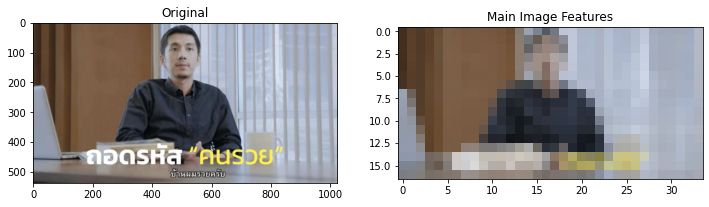

In [103]:
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax = plt.imshow(main_image)
ax = plt.title("Original")


ax = plt.subplot(1,2,2)
ax = plt.imshow(main_image_feature)
ax = plt.title("Main Image Features")

plt.savefig('act8_1.png', facecolor="white", transparent=True)

**8.1.2 Prepare tile images and features**

In [93]:
filenames = glob.glob('Background/*.jpg', recursive=True)

# Load image files and Resize (h,w,ch) -> h = w < 30 , ch = 3 (R,G,B)
# Convert the image to an array
# Normalized color image
tiles = []
for i in filenames:
    img = image.load_img(i, target_size=tile_size, interpolation="nearest")
    img = image.img_to_array(img)
    # img = img / 255
    tiles.append(img)

# Convert to numpy array
tiles = np.array(tiles)

# Create array of average(mean) color of each tile image

tile_features = []
for tile in tiles:
    mean_color = np.array(tile).mean(axis=(0,1))
    tile_features.append(mean_color)
# tile_features[0]


In [95]:
print(tiles.shape)

(100, 30, 30, 3)


**8.2 Image clustering and Matching using KNN with KDTree Algorithm**

In [91]:
# Create KDTree of tile color features
tree = spatial.KDTree(tile_features)

closest_tiles = np.zeros(shape=(main_image_feature.shape[0],main_image_feature.shape[1]))
#KNN (k=1) search for best mathched tiles with each subimage
for i in range(main_image_feature.shape[0]):
    for j in range(main_image_feature.shape[1]):
        closest = tree.query(main_image_feature[i,j])
        closest_tiles[i,j] = closest[1]
        # print(closest)

closest_tiles = closest_tiles.astype("uint8")
print(closest_tiles.shape)

(17, 34)


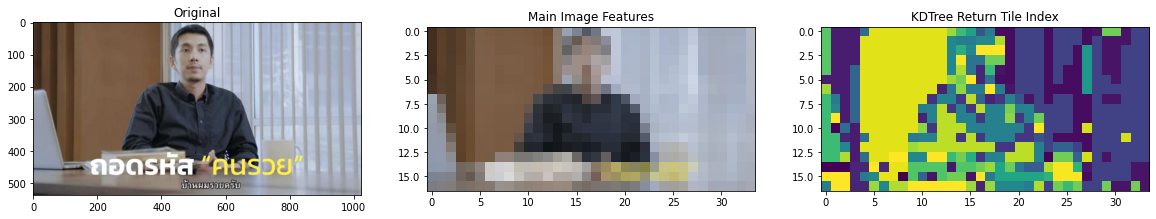

In [104]:
fig = plt.figure(figsize=(20,20))
ax = plt.subplot(1,3,1)
ax = plt.imshow(main_image)
ax = plt.title("Original")

ax = plt.subplot(1,3,2)
ax = plt.imshow(main_image_feature)
ax = plt.title("Main Image Features")

ax = plt.subplot(1,3,3)
ax = plt.imshow(closest_tiles)
ax = plt.title("KDTree Return Tile Index")

plt.savefig('act8_2.png', facecolor="white", transparent=True)

**8.3 Create image mosaic**

In [102]:
mosaic_image = np.array(main_image)
# Fill each subimage with matched tile

# Offset of tile
for i in range(main_image_feature.shape[0]):
    for j in range(main_image_feature.shape[1]):
        x,y = i*tile_size[0], j*tile_size[1]

        # Index of tile
        index = closest_tiles[i,j]
        mosaic_image[x:(x+tile_size[0]),y:(y+tile_size[1]),:] = tiles[index]

(538, 1024, 3)
(17, 34, 3)


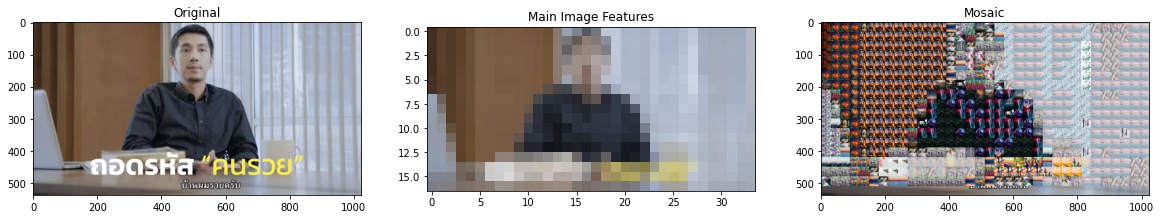

In [105]:
fig = plt.figure(figsize=(20,20))
ax = plt.subplot(1,3,1)
ax = plt.imshow(main_image)
ax = plt.title("Original")


ax = plt.subplot(1,3,2)
ax = plt.imshow(main_image_feature)
ax = plt.title("Main Image Features")

ax = plt.subplot(1,3,3)
ax = plt.imshow(mosaic_image)
ax = plt.title("Mosaic")

plt.savefig('act8_3.png', facecolor="white", transparent=True)